# Рабочая тетрадь №7

## Нейронные сети
### Обучение персептрона
Персептрон представляет собой элементарную часть нейронной сети.
Одиночный персептрон является линейным бинарным классификатором. В
этой лекции мы рассмотрим процедуру обучения персептрона для
классификации данных. Поскольку персептрон представляет собой
бинарный классификатор, то мы будем рассматривать лишь два класса.
Пусть мы рассматриваем некоторое множество (конечное или
бесконечное) n-мерных векторов, которые будем обозначать 𝑥 =
(𝑥1, 𝑥2, . . . , 𝑥𝑛)
Будем считать, что это множество разбивается на два класса, которые
мы будем обозначать +1 и -1. Поэтому возникает задача построения
функции, которая задана на нашем множестве векторов, и принимает
значения в множестве {+1, −1}. В качестве такой функции может выступать
персептрон. С алгебраической точки зрения персептрон состоит из вектора
весов 𝑤 = (𝑤0, 𝑤1, 𝑤2, . . . , 𝑤𝑛).
При этом персептрон работает по формуле
𝑦 = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑥1𝑤1 + 𝑥2𝑤2 + . . . + 𝑥𝑛𝑤𝑛),
где функция 𝑠𝑖𝑔𝑛(𝑡) равна +1, если 𝑡 ≥ 0, и равна −1, если 𝑡 < 0.
Приведем алгоритм обучения персептрона. Пусть у нас есть набор
обучающих данных {(𝑥, 𝑑)}, где 𝑥 - это различные вектора, а 𝑑 из множества
{+1, −1} указывает к какому классу относится наш вектор.
1. Положим вектор весов 𝑤 равным нулю.
2. Повторять 𝑁 раз следующие шаги:
3. Для каждого тестового набора (𝑥, 𝑑):
4. Вычислить 𝑦 = 𝑠𝑖𝑔𝑛[(𝑥, 𝑤)].
5. Если 𝑦𝑑 < 0, то скорректировать веса 𝑤0 = 𝑤0 + 𝑎𝑑, 𝑤𝑖 =
𝑤𝑖 + 𝑎𝑑𝑥𝑖
, 𝑖 = 1,2, . . . , 𝑛.
Описанный алгоритм довольно легко программировать.

### 1.1.1 Пример
Рассмотрим программу обучения персептрона на языке Python. Сначала
рассмотрим основной класс персептрона, который умеет учиться по
тестовым данным.

In [5]:
import math

import matplotlib.pyplot as plt


class Perceptron:
    def __init__(self,N):
        self.w=list()
        for i in range(N):
            self.w.append(0)

    def calc(self,x):
        res=0
        for i in range(len(self.w)):
            res=res+self.w[i]*x[i]
        return res

    def sign(self,x):
        if self.calc(x)>0:
            return 0
        else:
            return 1

    def learn(self,la,x,y):
        if y*self.calc(x)<=0:
            for i in range(len(self.w)):
                self.w[i]=self.w[i]+la*y*x[i]

    def learning(self, la,T):
        for n in range(100):
            for t in T:
                self.learn(la,t[0],t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится
и работает наш персептрон.

In [6]:
perceptron = Perceptron(2)
la=0.1

T = list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T)
print(perceptron.w)
print(perceptron.sign([1.5,2]))
print(perceptron.sign([3,1.5]))
print(perceptron.sign([5,1]))
print(perceptron.sign([5,10]))

[0.1, -0.1]
1
0
0
1


Видим, что что наш персептрон отлично научился распознавать образы,
относя к классу 1 те вектора, у которых первая компонента больше второй,
и к классу -1 в противном случае. Хотя устройство персептронов довольно
простое эти конструкции могут решать и практические задачи. Кроме того,
из таких персептронов состоят нейронные сети.

## Теоретический материал – Реализация нейронной сети на Python
Нейронная сеть — это функциональная единица машинного или
глубокого обучения. Она имитирует поведение человеческого мозга,
поскольку основана на концепции биологических нейронных сетей.
Наиболее распространенный тип нейронной сети, называемый
многослойным персептроном (MLP), представляет собой функцию, которая
отображает входные данные в выходные данные. MLP имеет один входной
слой и один выходной слой. Между ними может быть один или несколько
скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки.
Скрытые слои также могут иметь более одного нейрона. Каждый нейрон
представляет собой линейную функцию, к которой применяется функция
активации для решения сложных задач. Выход каждого слоя подается в
качестве входных данных для всех нейронов следующих слоев.
Нейронные сети способны решать множество задач. В основном они
состоят из таких компонентов:
− входной слой (получение и передача данных);
− скрытый слой (вычисление);
− выходной слой. Чтобы реализовать нейросеть, необходимо
понимать, как ведут себя нейроны. Нейрон одновременно
принимает несколько входов, обрабатывает эти данные и выдает
один выход. Нейронная сеть представляет собой блоки ввода и
вывода, где каждое соединение имеет соответствующие веса (это
сила связи нейронов; чем вес больше, тем один нейрон сильнее
влияет на другой). Данные всех входов умножаются на веса:
− 𝑥 → 𝑥 ∗ 𝑤1;
− 𝑦 → 𝑦 ∗ 𝑤2.
Входы после взвешивания суммируются с прибавлением значения
порога «c»:
𝑥𝑤1 + 𝑦𝑤2 + 𝑐
Полученное значение пропускается через функцию активации
(сигмоиду), которая преобразует входы в один выход:
𝑧 = 𝑓(𝑥𝑤1 + 𝑦𝑤2 + 𝑐).
Так выглядит сигмоида:
![Сигмоида](./imgs/Sigmoida.png)
Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа
стремятся к нулю, а положительные — к единице.
Например. Пусть нейрон имеет следующие значения: 𝑤 = [0,1] 𝑐 = 4.
Входной слой: 𝑥 = 2, 𝑦 = 3

### 1.1.2 Пример
Для написания кода нейрона будем использовать библиотеку Pytnon
— NumPy:

In [7]:
import numpy as np
def sigmoida(x):
    return 1/(1+np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights,inputs)+self.bias
        return sigmoida(total)

weigths = np.array([0,1])
bias = 4
n = Neuron(weigths,bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов.
Пример несложной нейронной сети
![Строение нейронки](./imgs/Neurostruct.png)
где:
𝑥1, 𝑥2 — входной слой;
ℎ1, ℎ2 — скрытый слой с двумя нейронами;
𝑜1 — выходной слой.
Например. Представим, что нейроны из графика выше имеют веса
[0, 1]. Пороговое значение (𝑏) у обоих нейронов равно 0 и они имеют
идентичную сигмоиду.
При входных данных 𝑥 = [2, 3] получим:
ℎ1 = ℎ2 = 𝑓(𝑤𝑥 + 𝑏) = 𝑓((02) + (1 ∗ 3) + 0) = 𝑓(3) = 0.95.
𝑜1 = 𝑓(𝑤 ∗ [ℎ1, ℎ2] + 𝑏) = 𝑓((0ℎ1) + (1ℎ2) + 0) = 𝑓(0.95) = 0.72.
Входные данные по нейронам передаются до тех пор, пока не
получатся выходные значения

In [8]:
import numpy as np
class OurNeuralNetwork:
    '''
    Данные сеточки:
        2 входа
        2 нейрона в скрытых
        выход
    Нейроны с равными весами и порогами
        w=[0,1]
        b=0
    '''

    def __init__(self):
        weigths = np.array([0,1])
        bias = 0
        self.h1 = Neuron(weigths,bias)
        self.h2 = Neuron(weigths, bias)
        self.o1 = Neuron(weigths, bias)

    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_o1=self.o1.feedforward(np.array([out_h1,out_h2]))
        return out_o1

net = OurNeuralNetwork()
x = np.array([2,3])
print(net.feedforward(x))

0.7216325609518421


### Теоретический материал – Обучение нейронной сети
Обучение нейросети — это подбор весов, которые соответствуют всем
входам для решения поставленных задач.
Класс нейронной сети:

Каждый этап процесса обучения состоит из:
− прямого распространения (прогнозируемый выход);
− обратного распространения (обновление весов и смещений).
Например:
Дана двуслойная нейросеть:
ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1
) + 𝑏2
).
В данном случае на выход ŷ влияют только две переменные — 𝑤 (веса) и 𝑏
(смещение). Настройку весов и смещений из данных входа или процесс
обучения нейросети можно изобразить так:
![Обучение](./imgs/NeuroLearn.png)
Прямое распространение.
Как видно, формула прямого распространения представляет собой
несложное вычисление:
ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1) + 𝑏2)
Далее необходимо добавить в код функцию прямого распространения.
Предположим, что смещения в этом случае будут равны 0.

Чтобы вычислить ошибку прогноза, необходимо использовать функцию
потери. В примере уместно воспользоваться формулой суммы квадратов
ошибок — средним значением между прогнозируемым и фактическим
результатами:
𝐸𝑟𝑟𝑜𝑟 = ∑(𝑦 − 𝑦̂)
2
𝑛
𝑖=1
.
Обратное распространение
Обратное распространение позволяет измерить производные в
обратном порядке — от конца к началу, и скорректировать веса и смещения.
Для этого необходимо узнать производную функции потери — тангенс угла
наклона.
Производная функции по отношению к весам и смещениям позволяет
узнать градиентный спуск. Производная функции потери не содержит весов
и смещений, для ее вычисления необходимо добавить правило цепи:
𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂) = ∑(𝑦 − 𝑦̂)
2
𝑛
𝑖=1
𝜕𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂)
𝜕𝑊
=
𝜕𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂)
𝜕𝑦̂
∙
𝜕𝑦̂
𝜕𝑧 ∙
𝜕𝑧
𝜕𝑊 =
= 2(𝑦 − 𝑦̂) ∙ производную сигмоиды ∙ 𝑥 =
= 2(𝑦 − 𝑦̂) ∙ 𝑧(1 − 𝑧) ∙ 𝑥,
где 𝑧 = 𝑊𝑥 + 𝑏.
Благодаря этому правилу можно регулировать веса. Добавляем в код
Python функцию обратного распространения:
Нейронные сети базируются на определенных алгоритмах и
математических функциях. Сначала может казаться, что разобраться в них
довольно сложно. Но существуют готовые библиотеки машинного обучения
для построения и тренировки нейросетей, позволяющие не углубляться в их
устройство.

In [9]:
def sigmoid_derivative(x):
  f = sigmoida(x)
  return f * (1 - f)
class NeuralNetwork:
    def __init__(self,x,y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)

    def feedforward(self):
        self.layer1 = sigmoida(np.dot(self.input,self.weights1))
        self.output = sigmoida(np.dot(self.layer1,self.weights2))

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y-self.output)*sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output)*sigmoid_derivative(self.output),self.weights2.T)*sigmoid_derivative(self.layer1)))

### Задание
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
Данные нейросети:
− три входа (𝑥1, 𝑥2, 𝑥3
);
− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
− выход (𝑜1).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [0.5, 0.5, 0.5]
− 𝑏 = 0

In [15]:
import numpy as np
class TripleNeuroNet:
    def __init__(self):
        weigths = np.array([0.5,0.5,0.5])
        bias = 0
        self.h1 = Neuron(weigths,bias)
        self.h2 = Neuron(weigths,bias)
        self.h3 = Neuron(weigths,bias)
        self.o1 = Neuron(weigths,bias)

    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        total = self.o1.feedforward(np.array([out_h1,out_h2,out_h3]))
        return total

net = TripleNeuroNet()
x=np.array([2,4,6])
print(net.feedforward(x))

0.8170206500405062


Данные нейросети:
− два входа (𝑥1, 𝑥2);
− два нейрона в скрытых слоях (ℎ1, ℎ2);
− два выхода (𝑜1, 𝑜2
).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [1, 0];
− 𝑏 = 1.


In [16]:
import numpy as np
class DoubleNeuroNet:
    def __init__(self):
        weigths = np.array([1,0])
        bias = 0
        self.h1 = Neuron(weigths,bias)
        self.h2 = Neuron(weigths,bias)
        self.o1 = Neuron(weigths,bias)
        self.o2 = Neuron(weigths,bias)

    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        total = []
        total.append(self.o1.feedforward(np.array([out_h1,out_h2])))
        total.append(self.o2.feedforward(np.array([out_h1,out_h2])))
        return total

net = DoubleNeuroNet()
x=np.array([2,4])
print(net.feedforward(x))

[0.7069873680001046, 0.7069873680001046]


Реализуйте классы нейронных сетей с использованием других функций
активации

In [18]:
import numpy as np
import math

class TanhNeuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights,inputs)+self.bias
        return math.tanh(total)

class TanhNeuroNet:
    def __init__(self):
        weigths = np.array([1,0])
        bias = 0
        self.h1 = TanhNeuron(weigths,bias)
        self.h2 = TanhNeuron(weigths,bias)
        self.o1 = TanhNeuron(weigths,bias)
        self.o2 = TanhNeuron(weigths,bias)

    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        total = []
        total.append(self.o1.feedforward(np.array([out_h1,out_h2])))
        total.append(self.o2.feedforward(np.array([out_h1,out_h2])))
        return total

net = TanhNeuroNet()
x=np.array([2,4])
print(net.feedforward(x))

[0.7460679984455996, 0.7460679984455996]


In [20]:
import numpy as np
import math

class ReLUNeuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights,inputs)+self.bias
        return max(0,total)

class ReluNeuroNet:
    def __init__(self):
        weigths = np.array([1,0])
        bias = 0
        self.h1 = ReLUNeuron(weigths,bias)
        self.h2 = ReLUNeuron(weigths,bias)
        self.o1 = ReLUNeuron(weigths,bias)
        self.o2 = ReLUNeuron(weigths,bias)

    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        total = []
        total.append(self.o1.feedforward(np.array([out_h1,out_h2])))
        total.append(self.o2.feedforward(np.array([out_h1,out_h2])))
        return total

net = ReluNeuroNet()
x=np.array([2,4])
print(net.feedforward(x))

[2, 2]


## 1.2. Введение в нейронные сети с помощью Scikit-Learn в Python
Теперь мы знаем, что такое нейронные сети и какие шаги необходимо
выполнить, чтобы построить простую нейронную сеть с плотными связями.
В этом разделе мы попытаемся построить простую нейронную сеть, которая
предсказывает класс, к которому принадлежит данное растение ириса. Мы
будем использовать библиотеку Python Scikit-Learn для создания нашей
нейронной сети.
Sklearn предоставляет 2 оценщика для задач классификации и
регрессии соответственно:
− MLPClassifier;
− MLPRegressor
Начнем с импорта необходимых библиотек.
```py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
```

### MLPClassifier
Загрузка данных
Мы будем загружать два набора данных.
Набор данных цифр: мы будем использовать набор данных цифр,
который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем
использовать цифровые данные для задач классификации.
Набор данных о жилье в Бостоне: мы будем использовать набор
данных о жилье в Бостоне, который содержит информацию о различных
свойствах дома, таких как среднее количество комнат, уровень преступности
на душу населения в городе и т. д. Мы будем использовать его для задач
регрессии.
Sklearn предоставляет оба этих набора данных. Мы можем загрузить
их, вызвав методы load_digits() и load_boston().

In [25]:
from sklearn.datasets import load_digits, fetch_california_housing #вместо Boston, удален в данной версии либы

digits = load_digits()
Xdig, Ydig = digits.data, digits.target
print("Dataset Sizes: ",Xdig.shape, Ydig.shape)

california = fetch_california_housing()
Xcalif, Ycalif = california.data, california.target
print("Dataset Sizes: ",Xcalif.shape, Ycalif.shape)

Dataset Sizes:  (1797, 64) (1797,)
Dataset Sizes:  (20640, 8) (20640,)


Классификация
MLPClassifier — это клвсс, доступный как часть модуля neuro_network
sklearn для выполнения задач классификации с использованием
многослойного персептрона.
Как обычно разделим набор данных на две части:
− данные обучения, которые будут использоваться для модели
обучения;
− тестовые данные, по которым будет проверяться точность
обученной модели.
Функция train_test_split модуля model_selection sklearn поможет нам
разделить данные на два набора: 80% для обучения и 20% для тестирования.
Мы также используем seed(random_state=123) с train_test_split, чтобы мы
всегда получали одно и то же разделение и могли сравнивать и
воспроизволить результаты в будущем.

In [26]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(Xdig,Ydig, train_size=0.8,test_size=0.2,stratify=Ydig,random_state=123)
print("Train/Test Sizes: ",xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)


In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=123)
mlp.fit(xtrain,ytrain)
Y_preds = mlp.predict(xtest)
print(Y_preds[:15])
print(ytest[:15])
print("Test accuracy: %.3f"%mlp.score(xtest,ytest))
print("Training Accuracy: %.3f"%mlp.score(xtrain,ytrain))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test accuracy: 0.983
Training Accuracy: 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и
предсказанные метки данных по модели. Затем он строит матрицу путаницы,
используя matplotlib

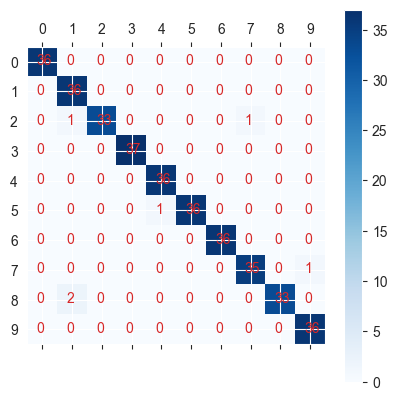

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(ytest,ypred):
    conf_mat = confusion_matrix(ytest,ypred)
    flg = plt.Figure(figsize=(6,6))
    plt.matshow(conf_mat,cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10),range(10))
    plt.xticks(range(10),range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1,str(conf_mat[j,i]),color='tab:red')

plot_confusion_matrix(ytest,mlp.predict(xtest))

Ниже приведен список важных атрибутов, доступных с MLPClassifier,
которые могут предоставить значимую информацию после обучения
модели.
− loss_ — возвращает убыток после завершения процесса обучения.
− coefs_ — возвращает массив длины n_layers-1, где каждый элемент
представляет веса, связанные с уровнем i.
− intercepts_ — возвращает массив длины n_layers-1, где каждый
элемент представляет собой перехват, связанный с персептронами
слоя i.
− n_iter_ — количество итераций, для которых выполнялась оценка.
− out_activation_ — возвращает имя функции активации выходного
слоя.

In [35]:
print("Loss: ", mlp.loss)
print("Number of Coefs: ", len(mlp.coefs_))
print("Number of Intercepts: ", len(mlp.intercepts_) )
print("Num of otterations for WER: ", mlp.n_iter_)
print("Name of Output Layer Activation Function: ", mlp.out_activation_)

Loss:  log_loss
Number of Coefs:  2
Number of Intercepts:  2
Num of otterations for WER:  125
Name of Output Layer Activation Function:  softmax


### MLPRegressor
MLPRegressor — это класс, доступный как часть библиотеки
neuro_network sklearn для выполнения задач регрессии с использованием
многослойного персептрона. Также разделим набор данных на две части:
− данные обучения (80%), которые будут использоваться для
модели обучения;
− тестовые данные (20%), по которым будет проверяться точность
обученной модели.

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(Xcalif, Ycalif, train_size=0.8, test_size=0.2, random_state=123)
print("Train/Test Sizes",xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

Train/Test Sizes (16512, 8) (4128, 8) (16512,) (4128,)


In [37]:
from sklearn.neural_network import MLPRegressor

regres = MLPRegressor(random_state=123)
regres.fit(xtrain,ytrain)

MLPRegressor(random_state=123)

In [38]:
y_preds = regres.predict(xtest)

print(y_preds[:10])
print(ytest[:10])
print('Test R^2 Score: %.3f'%regres.score(xtest,ytest))
print('Training R^2 Score: %.3f'%regres.score(xtrain,ytrain))

[1.90219935 1.43047514 1.3506227  0.76890059 2.34997826 2.56749015
 0.78763273 1.84240978 1.57480889 1.25957592]
[1.516 0.992 1.345 2.317 4.629 1.407 1.703 1.603 1.018 1.688]
Test R^2 Score: 0.417
Training R^2 Score: 0.418


In [39]:
print("Loss: ", regres.loss)
print("Number of Coefs: ", len(regres.coefs_))
print("Number of Intercepts: ", len(regres.intercepts_) )
print("Num of otterations for WER: ", regres.n_iter_)
print("Name of Output Layer Activation Function: ", regres.out_activation_)

Loss:  squared_error
Number of Coefs:  2
Number of Intercepts:  2
Num of otterations for WER:  28
Name of Output Layer Activation Function:  identity


Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv

In [44]:
import pandas as pd

iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
#iris.head()

X_train, X_test, Y_train, Y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], train_size=0.80, test_size=0.20, stratify=iris.iloc[:, -1], random_state=123)
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)
Y_preds = mlp_classifier.predict(X_test)
print(Y_preds[:5])
print(Y_test[:5])
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))

print('Loss:', mlp_classifier.loss_)
print('Number of Coefs:', len(mlp_classifier.coefs_))
print('Number of Intercepts:', len(mlp_classifier.intercepts_))
print('Number of Iterations for Which Estimator Ran:', mlp_classifier.n_iter_)
print('Number of Output Layer Activation Function:', mlp_classifier.out_activation_)

['Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Setosa']
80     Versicolor
45         Setosa
144     Virginica
110     Virginica
38         Setosa
Name: variety, dtype: object
Test Accuracy: 0.933
Training Accuracy: 0.983
Loss: 0.2988789340197434
Number of Coefs: 2
Number of Intercepts: 2
Number of Iterations for Which Estimator Ran: 200
Number of Output Layer Activation Function: softmax


C:\Users\srdhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
sal = pd.read_csv(url)
X_train, X_test, Y_train, Y_test = train_test_split(sal.iloc[:, :-1], sal.iloc[:, 0], train_size=0.80, test_size=0.20, random_state=123)

print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
mlp_reg = MLPRegressor(random_state=123)
mlp_reg.fit(X_train,Y_train)

Y_preds = mlp_reg.predict(X_test)
print(Y_preds[:10])
print(Y_test[:10])
print('Test Accuracy: %.3f'%mlp_reg.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_reg.score(X_train, Y_train))

print('Loss:', mlp_reg.loss_)
print('Number of Iterations for Which Estimator Ran:', mlp_reg.n_iter_)
print('Number of Output Layer Activation Function:', mlp_reg.out_activation_)
print('Number of Coefs:', len(mlp_reg.coefs_))

Train/Test Sizes:  (24, 1) (6, 1) (24,) (6,)
[ 3.31051161 10.13826574  3.02191336  9.25039488  3.31051161  9.33918197]
7      3.2
29    10.5
5      2.9
26     9.5
8      3.2
27     9.6
Name: YearsExperience, dtype: float64
Test Accuracy: 0.996
Training Accuracy: 0.997
Loss: 0.008698047282581502
Number of Iterations for Which Estimator Ran: 200
Number of Output Layer Activation Function: identity
Number of Coefs: 2


C:\Users\srdhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
